In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [131]:
fileName = "C:\\Users\\macbe\\Downloads\\survey lung cancer.csv"
df = pd.read_csv(fileName)

In [132]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [133]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [137]:
print(df.isnull().sum())
print('Duplication Count:', df.duplicated().sum())


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
Duplication Count: 33


array([[<AxesSubplot:title={'center':'GENDER'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>],
       [<AxesSubplot:title={'center':'ANXIETY'}>,
        <AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE '}>],
       [<AxesSubplot:title={'center':'ALLERGY '}>,
        <AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>],
       [<AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>,
        <AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>,
        <AxesSubplot:title={'center':'LUNG_CANCER'}>]], dtype=object)

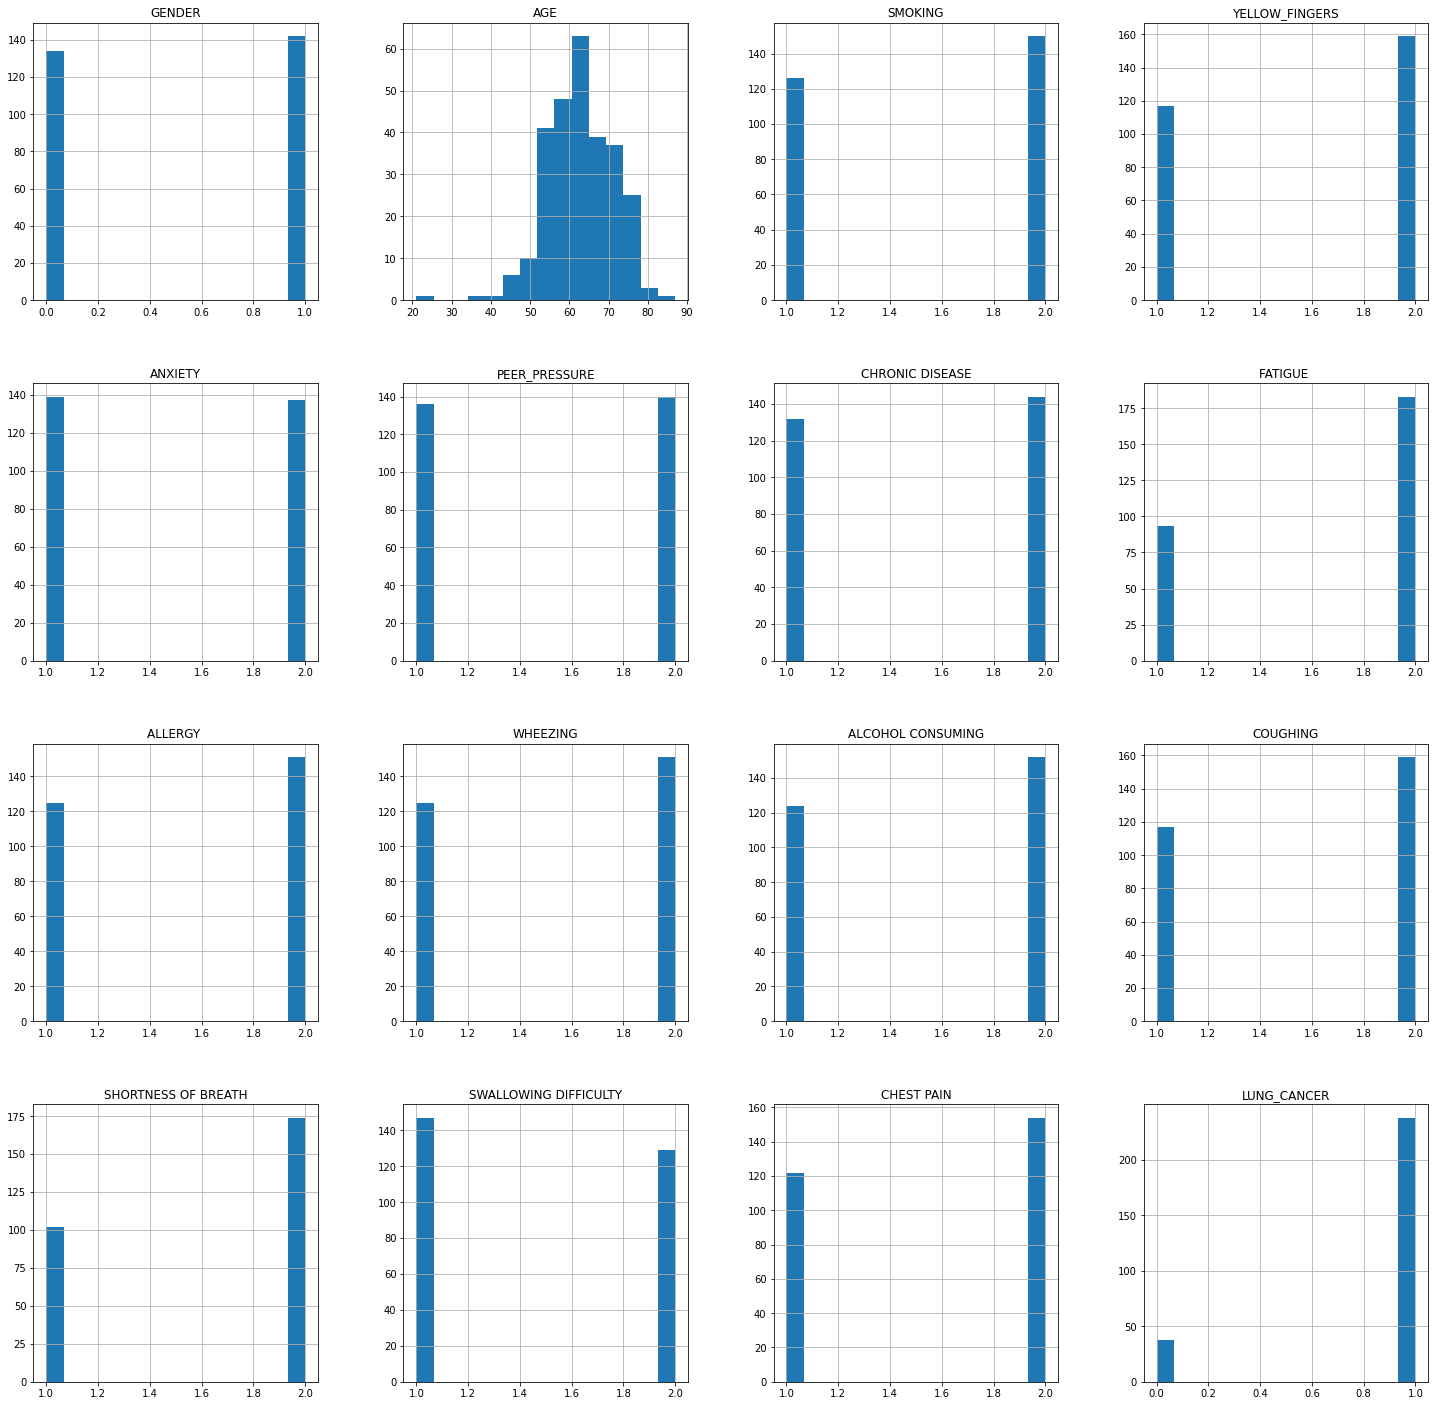

In [168]:
df.hist(figsize=(25,25), bins=15)

In [139]:
df = df.dropna()
df = df[~df.duplicated()]
df['GENDER'] = df['GENDER'].replace({'M' : 1, 'F' : 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES' : 1, 'NO' : 0})
print(df['GENDER'].value_counts())
print(df['LUNG_CANCER'].value_counts())

1    142
0    134
Name: GENDER, dtype: int64
1    238
0     38
Name: LUNG_CANCER, dtype: int64


In [143]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [155]:
symptoms = ['ALLERGY ','WHEEZING','CHEST PAIN','SWALLOWING DIFFICULTY','YELLOW_FINGERS','COUGHING','SHORTNESS OF BREATH', 'FATIGUE '] 

In [159]:
X = df[symptoms].values

In [160]:

y = df['LUNG_CANCER']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [189]:
Logistic = LogisticRegression(max_iter = 2000)
Logistic.fit(X_train,y_train)
train_score = Logistic.score(X_train,y_train)
print("Training Data Score:", train_score)
test_score = Logistic.score(X_test, y_test)
print("Testing Data Score:", test_score)

Training Data Score: 0.8985507246376812
Testing Data Score: 0.855072463768116


In [180]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [181]:
train_score = knn.score(X_train,y_train)
print("Training Data Score:", train_score)
test_score = knn.score(X_test, y_test)
print("Testing Data Score:", test_score)

Training Data Score: 0.9178743961352657
Testing Data Score: 0.8115942028985508
